# Para este Proyecto

*Conexión a la base de datos*
- Crea un cursor desde Python que permite conectarse y hacer consultas o querys a la base de datos previamente creada.

*Limpieza y transformación de los datos*
- Lee los datos y haz la limpieza de estos a formatos que te resulten más útiles para el posterior análisis.
- Transforma los datos para obtener la siguiente información y darnos una idea de los datos que tenemos:
    - (a)  Número promedio de delitos agrupados por municipio y año-mes de ocurrencia de estos.
    - (b)  El delito más común por municipio
    - (c)  La temporada con más crímenes en México
    - (d)  El número promedio de delitos agrupados por tipo de delito y año y mes en la ciudad de México ordenados de mayor a menor
    - (e)  Un análisis propio que sea de tu interés.

*Visualización de los datos*

- Imagina que trabajas en una aseguradora de auto y que como analista de datos te piden que ayudes a generar nuevas estrategias que apoyen a medir el riesgo por municipio con el fin de dar un precio competitivo y rentable. Lo que tienes que tomar en cuenta es que el número de crímenes relacionados con automóviles por municipio determinará cuánto vamos a cobrar, a mayor riesgo mayor el costo de asegurar un vehículo.

    - Filtra la información necesaria y transfórmala para generar vistas de interés.
    - Plantea al menos 3 vistas con las que podrías medir los distintos tipos de riesgo por municipio.
    - Genera los archivos wiframe y las pestañas correspondientes en Google Data Studio


---

# Desarrollo

Antes de empezar con los puntos de la base de datos, iniciciare con el manejo y limpieza de datos del documento seleccionado, esto para facilitar de mejor manera el analsisi en SQL.

## Importacion de librerias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importacion del CSV

In [3]:
df = pd.read_csv('../../Archivos-Analisis/files-proyecto-m40/Fuero_federal_2012-2025_oct2025.csv', encoding='latin-1')
df.sample(10)

,AÑO,INEGI,ENTIDAD,LEY,CONCEPTO,TIPO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
8160,2020,13.0,HIDALGO,OTRAS LEYES Y CODIGOS,OTRAS LEYES Y CODIGOS,LEY GENERAL EN MATERIA DE DELITOS ELECTORALES ...,1,1,1,0,3,1,1,0,3,12,2.0,1.0
6814,2019,22.0,QUERETARO,CODIGO PENAL FEDERAL,OTROS DELITOS,ELECTORALES,0,0,0,0,0,1,0,0,0,0,0.0,0.0
2521,2014,13.0,HIDALGO,OTRAS LEYES Y CODIGOS,OTRAS LEYES Y CODIGOS,LEY DE LA PROPIEDAD INDUSTRIAL (L.P.I.),0,0,0,1,0,1,0,0,1,1,0.0,0.0
4382,2016,14.0,JALISCO,OTRAS LEYES Y CODIGOS,OTRAS LEYES Y CODIGOS,LEY DE VIAS GENERALES DE COMUNICACION (L.V.G.C.),1,0,1,1,1,2,8,5,6,1,2.0,5.0
7064,2019,5.0,COAHUILA,OTRAS LEYES Y CODIGOS,OTRAS LEYES Y CODIGOS,"LEYES DE INSTITUCIONES DE CREDITO, INVERSION, ...",0,2,2,1,3,2,0,0,0,0,1.0,1.0
4019,2016,21.0,PUEBLA,CODIGO PENAL FEDERAL,CONTRA LA SALUD,COMERCIO,0,0,1,0,1,0,1,0,0,1,0.0,0.0
11075,2023,9.0,CIUDAD DE MEXICO,OTRAS LEYES Y CODIGOS,OTRAS LEYES Y CODIGOS,LEY FEDERAL PARA PREVENIR Y SANCIONAR LOS DELI...,10,12,7,2,9,9,15,9,9,8,5.0,5.0
6769,2019,19.0,NUEVO LEON,CODIGO PENAL FEDERAL,OTROS DELITOS,PATRIMONIALES,60,30,24,13,17,24,34,42,40,18,56.0,50.0
11810,2024,25.0,SINALOA,CODIGO PENAL FEDERAL,OTROS DELITOS,CONTRA EL AMBIENTE Y LA GESTION AMBIENTAL,1,0,1,4,2,1,4,3,1,3,1.0,1.0
12449,2025,3.0,BAJA CALIFORNIA SUR,CODIGO PENAL FEDERAL,OTROS DELITOS,CONTRA LA INTEGRIDAD CORPORAL,1,2,1,1,2,2,1,0,0,0,NaN,NaN


## Lectura de datos
Conoceremos los tipos de datos, asi como la cantidad de resgistros del df

In [4]:
df['AÑO'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025])

In [5]:
df.shape

(13398, 18)

In [6]:
df.dtypes

AÑO             int64
INEGI         float64
ENTIDAD        object
LEY            object
CONCEPTO       object
TIPO           object
ENERO           int64
FEBRERO         int64
MARZO           int64
ABRIL           int64
MAYO            int64
JUNIO           int64
JULIO           int64
AGOSTO          int64
SEPTIEMBRE      int64
OCTUBRE         int64
NOVIEMBRE     float64
DICIEMBRE     float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13398 entries, 0 to 13397
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AÑO         13398 non-null  int64  
 1   INEGI       12992 non-null  float64
 2   ENTIDAD     13398 non-null  object 
 3   LEY         13398 non-null  object 
 4   CONCEPTO    13398 non-null  object 
 5   TIPO        13398 non-null  object 
 6   ENERO       13398 non-null  int64  
 7   FEBRERO     13398 non-null  int64  
 8   MARZO       13398 non-null  int64  
 9   ABRIL       13398 non-null  int64  
 10  MAYO        13398 non-null  int64  
 11  JUNIO       13398 non-null  int64  
 12  JULIO       13398 non-null  int64  
 13  AGOSTO      13398 non-null  int64  
 14  SEPTIEMBRE  13398 non-null  int64  
 15  OCTUBRE     13398 non-null  int64  
 16  NOVIEMBRE   12408 non-null  float64
 17  DICIEMBRE   12408 non-null  float64
dtypes: float64(3), int64(11), object(4)
memory usage: 1.8+ MB


In [8]:
df.describe().round(2)

,AÑO,INEGI,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
count,13398.00,12992.00,13398.00,13398.00,13398.00,13398.00,13398.00,13398.00,13398.00,13398.0,13398.00,13398.00,12408.00,12408.00
mean,2018.62,16.50,7.55,7.96,8.53,7.91,8.30,8.56,8.33,8.1,7.66,8.30,7.72,7.20
std,4.03,9.23,25.30,27.15,28.18,26.44,27.67,28.17,27.30,26.3,24.09,27.31,26.35,24.96
min,2012.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
25%,2015.00,8.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
50%,2019.00,16.50,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00
75%,2022.00,24.25,5.00,5.00,6.00,5.00,6.00,6.00,6.00,6.0,5.00,6.00,5.00,5.00
max,2025.00,32.00,757.00,792.00,941.00,928.00,878.00,758.00,763.00,825.0,607.00,754.00,765.00,667.00


### Deteccion de valores nulos
Para depuracion o conversion a 0

In [9]:
df.isnull().sum()

AÑO             0
INEGI         406
ENTIDAD         0
LEY             0
CONCEPTO        0
TIPO            0
ENERO           0
FEBRERO         0
MARZO           0
ABRIL           0
MAYO            0
JUNIO           0
JULIO           0
AGOSTO          0
SEPTIEMBRE      0
OCTUBRE         0
NOVIEMBRE     990
DICIEMBRE     990
dtype: int64

In [10]:
# Revision de filas con valores nulos en columnas específicas
df[df['INEGI'].isnull()]

# df[df['NOVIEMBRE'].isnull()]

# df[df['DICIEMBRE'].isnull()]

,AÑO,INEGI,ENTIDAD,LEY,CONCEPTO,TIPO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
512,2012,NaN,EXTRANJERO,CODIGO PENAL FEDERAL,CONTRA LA SALUD,PRODUCCION,0,0,0,0,0,0,1,0,0,0,0.0,0.0
513,2012,NaN,EXTRANJERO,CODIGO PENAL FEDERAL,CONTRA LA SALUD,TRANSPORTE,0,0,0,0,0,0,0,0,0,0,0.0,0.0
514,2012,NaN,EXTRANJERO,CODIGO PENAL FEDERAL,CONTRA LA SALUD,TRAFICO,0,0,0,0,0,0,0,0,0,0,0.0,0.0
515,2012,NaN,EXTRANJERO,CODIGO PENAL FEDERAL,CONTRA LA SALUD,COMERCIO,0,0,0,0,0,0,0,0,0,0,0.0,0.0
516,2012,NaN,EXTRANJERO,CODIGO PENAL FEDERAL,CONTRA LA SALUD,SUMINISTRO,0,0,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13393,2025,NaN,EXTRANJERO,OTRAS LEYES Y CODIGOS,LEY GENERAL DE SALUD (L.G.S.),OTROS DELITOS PREVISTOS EN LA L.G.S.,0,0,0,0,0,0,0,0,0,0,NaN,NaN
13394,2025,NaN,EXTRANJERO,OTRAS LEYES Y CODIGOS,LEY FEDERAL CONTRA LA DELINCUENCIA ORGANIZADA ...,CONTRA LA SALUD,0,0,0,0,0,0,0,0,0,0,NaN,NaN
13395,2025,NaN,EXTRANJERO,OTRAS LEYES Y CODIGOS,LEY FEDERAL CONTRA LA DELINCUENCIA ORGANIZADA ...,OTROS DELITOS PREVISTOS EN LA L.F.C.D.O.,0,0,0,0,0,0,0,0,0,0,NaN,NaN
13396,2025,NaN,EXTRANJERO,OTRAS LEYES Y CODIGOS,OTRAS LEYES Y CODIGOS,"LEYES DE INSTITUCIONES DE CREDITO, INVERSION, ...",0,1,0,0,0,0,0,0,0,0,NaN,NaN


Correccion de datos nulos, se les asignara el valor como 0, ya que se consideraran como valores faltantes

In [11]:
# Llenado de valores nulos en las columnas a nuevo valor 0
df['INEGI'].fillna(0, inplace=True)
df['NOVIEMBRE'].fillna(0, inplace=True)
df['DICIEMBRE'].fillna(0, inplace=True)

C:\Users\RyanHz\AppData\Local\Temp\ipykernel_16356\604233878.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['INEGI'].fillna(0, inplace=True)
C:\Users\RyanHz\AppData\Local\Temp\ipykernel_16356\604233878.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [12]:
# Verificacion
df.isnull().sum()

AÑO           0
INEGI         0
ENTIDAD       0
LEY           0
CONCEPTO      0
TIPO          0
ENERO         0
FEBRERO       0
MARZO         0
ABRIL         0
MAYO          0
JUNIO         0
JULIO         0
AGOSTO        0
SEPTIEMBRE    0
OCTUBRE       0
NOVIEMBRE     0
DICIEMBRE     0
dtype: int64

## Cambio de tipo de valor por columna
En las siguientes columnas, se cambiara su tipo de dato, debido a que estas no llevan una relacion a comparacion de las demas columnas, las columnas a mencionar cuentan con el tipo de dato *float*, a comparacion de las demas que son del tipo *int*, se realizara este cambio para una mejor semantica en la lectura y analisis, ya que los valores decimales pueden ocacionar sesgos en el analsisis

Columnas:
- INEGI
- NOVIEMBRE
- DICIEMBRE

In [13]:
# Covertimos los tipos de datos float a tipo int
df['INEGI'] = df['INEGI'].astype(int)
df['NOVIEMBRE'] = df['NOVIEMBRE'].astype(int)
df['DICIEMBRE'] = df['DICIEMBRE'].astype(int)

In [14]:
# Corroboramos el cambio
df.dtypes

AÑO            int64
INEGI          int64
ENTIDAD       object
LEY           object
CONCEPTO      object
TIPO          object
ENERO          int64
FEBRERO        int64
MARZO          int64
ABRIL          int64
MAYO           int64
JUNIO          int64
JULIO          int64
AGOSTO         int64
SEPTIEMBRE     int64
OCTUBRE        int64
NOVIEMBRE      int64
DICIEMBRE      int64
dtype: object

Tambien se cambiara el valor de tipo *obj* a *string*, esto para evitar problemas a futuro con los tipos de datos

Columna:
- ENTIDAD
- LEY
- CONCEPTOS
- TIPO

In [15]:
# Covertimos los tipos de datos *object* a *string*
df['ENTIDAD'] = df['ENTIDAD'].astype('string')
df['LEY'] = df['LEY'].astype('string')
df['CONCEPTO'] = df['CONCEPTO'].astype('string')
df['TIPO'] = df['TIPO'].astype('string')

In [16]:
# Corroboramos
df.dtypes

AÑO                    int64
INEGI                  int64
ENTIDAD       string[python]
LEY           string[python]
CONCEPTO      string[python]
TIPO          string[python]
ENERO                  int64
FEBRERO                int64
MARZO                  int64
ABRIL                  int64
MAYO                   int64
JUNIO                  int64
JULIO                  int64
AGOSTO                 int64
SEPTIEMBRE             int64
OCTUBRE                int64
NOVIEMBRE              int64
DICIEMBRE              int64
dtype: object

## Analisis basico solicitado
- (a)  Número promedio de delitos agrupados por municipio y año-mes de ocurrencia de estos.
- (b)  El delito más común por municipio
- (c)  La temporada con más crímenes en México
- (d)  El número promedio de delitos agrupados por tipo de delito y año y mes en la ciudad de México ordenados de mayor a menor
- (e)  Un análisis propio que sea de tu interés.

### (a) Número promedio de delitos agrupados por municipio y año-mes de ocurrencia

In [17]:
# (a) Número promedio de delitos agrupados por municipio y año-mes de ocurrencia
# Primero, reorganizamos los datos para tener una estructura año-mes

months = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 
          'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']

# Convertir de formato ancho a largo
df_long = df.melt(id_vars=['AÑO', 'ENTIDAD', 'LEY', 'CONCEPTO', 'TIPO', 'INEGI'],
                   value_vars=months,
                   var_name='MES',
                   value_name='DELITOS')

# Crear columna AÑO-MES
df_long['AÑO_MES'] = df_long['AÑO'].astype(str) + '-' + df_long['MES']

# Agrupar por ENTIDAD (municipio) y AÑO_MES, calcular promedio
promedio_delitos = df_long.groupby(['ENTIDAD', 'AÑO_MES'])['DELITOS'].sum().reset_index().round(2)
promedio_delitos.columns = ['MUNICIPIO', 'AÑO_MES', 'TOTAL_DELITOS']

# Calcular promedio por municipio
promedio_por_municipio = promedio_delitos.groupby('MUNICIPIO')['TOTAL_DELITOS'].mean().reset_index().round(2)
promedio_por_municipio.columns = ['MUNICIPIO', 'PROMEDIO_DELITOS']
promedio_por_municipio = promedio_por_municipio.sort_values('PROMEDIO_DELITOS', ascending=False)

promedio_por_municipio.head(15)

,MUNICIPIO,PROMEDIO_DELITOS
6,CIUDAD DE MEXICO,1183.15
15,MEXICO,522.01
14,JALISCO,483.42
11,GUANAJUATO,438.28
1,BAJA CALIFORNIA,428.65
30,VERACRUZ,392.81
28,TAMAULIPAS,325.84
26,SONORA,313.59
21,PUEBLA,289.83
16,MICHOACAN,274.82


In [18]:
df_long

,AÑO,ENTIDAD,LEY,CONCEPTO,TIPO,INEGI,MES,DELITOS,AÑO_MES
0,2012,AGUASCALIENTES,CODIGO PENAL FEDERAL,CONTRA LA SALUD,PRODUCCION,1,ENERO,0,2012-ENERO
1,2012,AGUASCALIENTES,CODIGO PENAL FEDERAL,CONTRA LA SALUD,TRANSPORTE,1,ENERO,0,2012-ENERO
2,2012,AGUASCALIENTES,CODIGO PENAL FEDERAL,CONTRA LA SALUD,TRAFICO,1,ENERO,0,2012-ENERO
3,2012,AGUASCALIENTES,CODIGO PENAL FEDERAL,CONTRA LA SALUD,COMERCIO,1,ENERO,13,2012-ENERO
4,2012,AGUASCALIENTES,CODIGO PENAL FEDERAL,CONTRA LA SALUD,SUMINISTRO,1,ENERO,0,2012-ENERO
...,...,...,...,...,...,...,...,...,...
160771,2025,EXTRANJERO,OTRAS LEYES Y CODIGOS,LEY GENERAL DE SALUD (L.G.S.),OTROS DELITOS PREVISTOS EN LA L.G.S.,0,DICIEMBRE,0,2025-DICIEMBRE
160772,2025,EXTRANJERO,OTRAS LEYES Y CODIGOS,LEY FEDERAL CONTRA LA DELINCUENCIA ORGANIZADA ...,CONTRA LA SALUD,0,DICIEMBRE,0,2025-DICIEMBRE
160773,2025,EXTRANJERO,OTRAS LEYES Y CODIGOS,LEY FEDERAL CONTRA LA DELINCUENCIA ORGANIZADA ...,OTROS DELITOS PREVISTOS EN LA L.F.C.D.O.,0,DICIEMBRE,0,2025-DICIEMBRE
160774,2025,EXTRANJERO,OTRAS LEYES Y CODIGOS,OTRAS LEYES Y CODIGOS,"LEYES DE INSTITUCIONES DE CREDITO, INVERSION, ...",0,DICIEMBRE,0,2025-DICIEMBRE


Haremos algunos cambios en el DF limpio(df_long) para posteriormente guardarlo

In [19]:
df_long['MES'] = df_long['MES'].astype('string')
df_long['AÑO_MES'] = df_long['AÑO_MES'].astype('string')

In [20]:
df_long.dtypes

AÑO                  int64
ENTIDAD     string[python]
LEY         string[python]
CONCEPTO    string[python]
TIPO        string[python]
INEGI                int64
MES         string[python]
DELITOS              int64
AÑO_MES     string[python]
dtype: object

In [26]:
# Remover comas de los valores en el dataframe
df_long['TIPO'] = df_long['TIPO'].str.replace(',', '')

In [ ]:
promedio_delitos

### (b)  El delito más común por municipio

In [50]:
# (b) El delito más común por municipio
# Agrupar por ENTIDAD (municipio) y CONCEPTO, sumar delitos
delitos_por_concepto = df_long.groupby(['ENTIDAD', 'CONCEPTO'])['DELITOS'].sum().reset_index()

# Encontrar el delito más común por municipio
delito_mas_comun = delitos_por_concepto.loc[delitos_por_concepto.groupby('ENTIDAD')['DELITOS'].idxmax()]
delito_mas_comun.columns = ['MUNICIPIO', 'DELITO_MAS_COMUN', 'TOTAL_DELITOS']
delito_mas_comun = delito_mas_comun.sort_values('TOTAL_DELITOS', ascending=False).reset_index(drop=True)

delito_mas_comun.head(10)

,MUNICIPIO,DELITO_MAS_COMUN,TOTAL_DELITOS
0,CIUDAD DE MEXICO,OTROS DELITOS,103063
1,MEXICO,OTROS DELITOS,46195
2,VERACRUZ,OTROS DELITOS,39773
3,GUANAJUATO,OTROS DELITOS,33405
4,JALISCO,OTROS DELITOS,32585
5,BAJA CALIFORNIA,OTRAS LEYES Y CODIGOS,27547
6,TAMAULIPAS,OTRAS LEYES Y CODIGOS,26234
7,PUEBLA,OTROS DELITOS,24073
8,SONORA,OTRAS LEYES Y CODIGOS,21594
9,NUEVO LEON,OTRAS LEYES Y CODIGOS,21563


### (c)  La temporada con más crímenes en México

In [58]:
# (c) La temporada con mas crimenes en Mexico
# Agrupar por MES y sumar delitos
delitos_por_mes = df_long.groupby('AÑO_MES')['DELITOS'].sum().reset_index()

# Encontramos el delito mas comun por mes
delitos_por_mes = delitos_por_mes.loc[delitos_por_mes.groupby('AÑO_MES')['DELITOS'].idxmax()]
delitos_por_mes.columns = ['AÑO_MES', 'TOTAL_DELITOS']
delitos_por_mes = delitos_por_mes.sort_values('TOTAL_DELITOS', ascending=False).reset_index(drop=True)

delitos_por_mes.head(10)

,AÑO_MES,TOTAL_DELITOS
0,2012-MARZO,12583
1,2012-JUNIO,12197
2,2012-JULIO,12160
3,2012-MAYO,12027
4,2012-AGOSTO,11048
5,2012-ENERO,10790
6,2012-FEBRERO,10788
7,2012-ABRIL,10753
8,2018-OCTUBRE,10181
9,2018-JUNIO,10008


### (d)  El número promedio de delitos agrupados por tipo de delito y año y mes en la ciudad de México ordenados de mayor a menor 

In [64]:
# (d) El número promedio de delitos agrupados por tipo de delito y año y mes en la ciudad de México ordenados de mayor a menor

# Filtrar solo Ciudad de México
df_cdmx = df_long[df_long['ENTIDAD'] == 'CIUDAD DE MEXICO']

# Agrupar por TIPO y AÑO_MES, sumar delitos
delitos_por_tipo_cdmx = df_cdmx.groupby(['TIPO', 'AÑO_MES'])['DELITOS'].sum().reset_index()

# Calcular promedio por tipo de delito
promedio_tipo_cdmx = delitos_por_tipo_cdmx.groupby('TIPO')['DELITOS'].mean().reset_index().round(2)
promedio_tipo_cdmx.columns = ['TIPO', 'PROMEDIO_DELITOS']
promedio_tipo_cdmx = promedio_tipo_cdmx.sort_values('PROMEDIO_DELITOS', ascending=False)

promedio_tipo_cdmx

,TIPO,PROMEDIO_DELITOS
17,"LEYES DE INSTITUCIONES DE CREDITO, INVERSION, ...",274.96
23,PATRIMONIALES,258.67
9,"FALSEDAD, TITULO DECIMO TERCERO",123.76
20,OTROS DELITOS DEL C.P.F.,110.38
2,COMETIDOS POR SERVIDORES PUBLICOS,78.16
13,LEY FEDERAL DE ARMAS DE FUEGO Y EXPLOSIVOS (L....,69.63
18,OTRAS LEYES ESPECIALES,52.27
10,LEY DE LA PROPIEDAD INDUSTRIAL (L.P.I.),46.46
0,CODIGO FISCAL DE LA FEDERACION (C.F.F.),31.21
24,POSESION,21.37


### (e)  Un análisis propio que sea de tu interés.

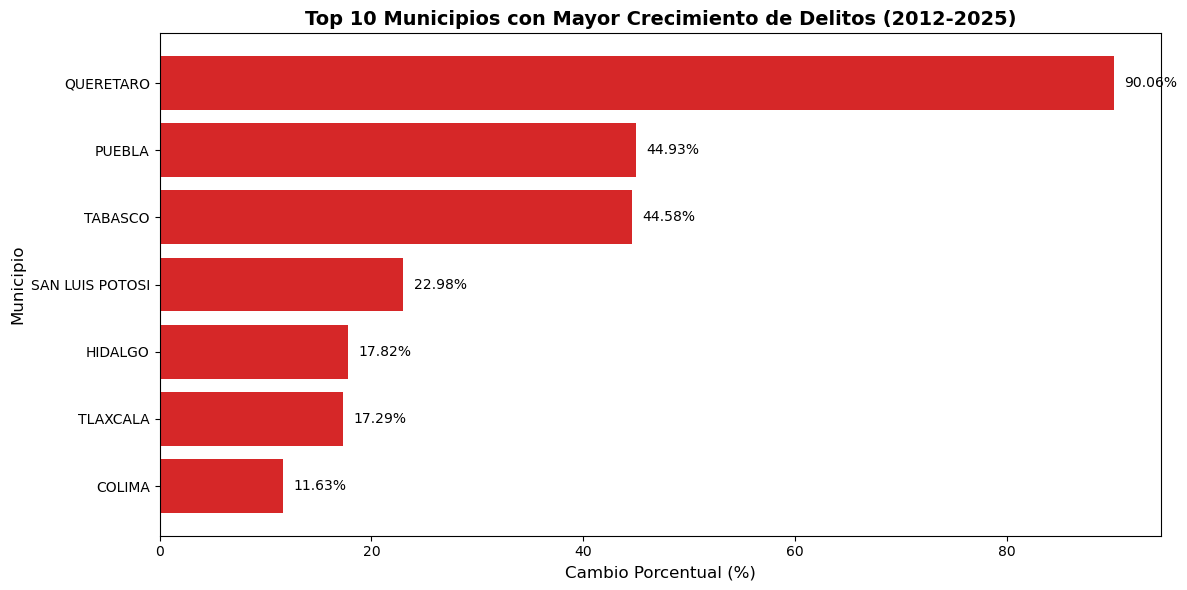


=== TOP 10 MUNICIPIOS CON MAYOR CRECIMIENTO DE DELITOS ===

      MUNICIPIO  AÑO_INICIO  AÑO_FIN  DELITOS_INICIO  DELITOS_FIN  CAMBIO_ABSOLUTO  CAMBIO_PORCENTUAL
      QUERETARO        2012     2025            1418         2695             1277              90.06
         PUEBLA        2012     2025            2290         3319             1029              44.93
        TABASCO        2012     2025            1171         1693              522              44.58
SAN LUIS POTOSI        2012     2025            1149         1413              264              22.98
        HIDALGO        2012     2025            2233         2631              398              17.82
       TLAXCALA        2012     2025            1012         1187              175              17.29
         COLIMA        2012     2025             834          931               97              11.63


In [ ]:
# Visualización del top 10 municipios con mayor crecimiento de delitos
fig, ax = plt.subplots(figsize=(12, 6))

top_10_crecimiento = tendencia_delitos[tendencia_delitos['CAMBIO_PORCENTUAL'] > 0].head(10)

ax.barh(top_10_crecimiento['MUNICIPIO'], top_10_crecimiento['CAMBIO_PORCENTUAL'], color='#d62728')
ax.set_xlabel('Cambio Porcentual (%)', fontsize=12)
ax.set_ylabel('Municipio', fontsize=12)
ax.set_title('Top 10 Municipios con Mayor Crecimiento de Delitos (2012-2025)', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Agregamos valores en las barras
for i, v in enumerate(top_10_crecimiento['CAMBIO_PORCENTUAL']):
    ax.text(v + 1, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()

# Creacion de la tabla resumen
print("\n=== TOP 10 MUNICIPIOS CON MAYOR CRECIMIENTO DE DELITOS ===\n")
print(top_10_crecimiento.to_string(index=False))

# Guardado del DF limpio

In [27]:
df_long.to_csv('../../Archivos-Analisis/files-proyecto-m40/Fuero_federal_limpio.csv', index=False, encoding='utf-8')

# DF de referencia
Este query se ejecuta al inicio del analisis para tener de referencia el DF original y para tener mas a la mano la informacion, ya que mientras mas codigo se genera, la info pirncipal se va quedando mas arriba y se piuerde tiempo en hacer scrolling

In [25]:
df.head(15)

,AÑO,INEGI,ENTIDAD,LEY,CONCEPTO,TIPO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
0,2012,1,AGUASCALIENTES,CODIGO PENAL FEDERAL,CONTRA LA SALUD,PRODUCCION,0,0,0,0,0,0,0,0,0,0,1,0
1,2012,1,AGUASCALIENTES,CODIGO PENAL FEDERAL,CONTRA LA SALUD,TRANSPORTE,0,0,0,3,1,3,0,0,0,0,2,0
2,2012,1,AGUASCALIENTES,CODIGO PENAL FEDERAL,CONTRA LA SALUD,TRAFICO,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,1,AGUASCALIENTES,CODIGO PENAL FEDERAL,CONTRA LA SALUD,COMERCIO,13,9,18,16,8,14,13,6,0,0,0,0
4,2012,1,AGUASCALIENTES,CODIGO PENAL FEDERAL,CONTRA LA SALUD,SUMINISTRO,0,0,0,0,0,0,0,0,0,0,0,0
5,2012,1,AGUASCALIENTES,CODIGO PENAL FEDERAL,CONTRA LA SALUD,POSESION,22,22,21,24,24,16,10,12,1,1,4,0
6,2012,1,AGUASCALIENTES,CODIGO PENAL FEDERAL,CONTRA LA SALUD,OTROS,1,1,0,1,0,1,2,4,0,1,3,0
7,2012,1,AGUASCALIENTES,CODIGO PENAL FEDERAL,OTROS DELITOS,COMETIDOS POR SERVIDORES PUBLICOS,4,0,1,3,0,4,3,1,3,0,4,3
8,2012,1,AGUASCALIENTES,CODIGO PENAL FEDERAL,OTROS DELITOS,CONTRA EL AMBIENTE Y LA GESTION AMBIENTAL,9,4,2,0,0,1,0,4,2,1,0,0
9,2012,1,AGUASCALIENTES,CODIGO PENAL FEDERAL,OTROS DELITOS,CONTRA LA INTEGRIDAD CORPORAL,1,0,0,0,0,1,0,0,0,0,0,0


---

# Conclusiones / Comentarios
Para dar por terminado este analaisis, se obtuvieron las siguientes notas:

-Tema: Estrategias para medir el riesgo por entidades-

*Razon:*
*Dar precios rentables y competitivos respecto a las zonas*

-Tomar en cuenta:-
numero de crimenes relacionados con automoviles por entidades
(Esto determina el monto a cobrar)

MAYOR RIESTO = MAYOR COSTO

## Comentarios

Con estas observaciones y con el wireframe realizado, podemos llegar a algunas conclusiones y comentarios respecto a los precios de los seguros de los autos.

La CDMX es una de las entidades con mas registro delectivo por difrencia ante las demas(Top 5), sin embargo, con el paso de los año, esta ha ido disminuyendo sus cifras, por ejemplo, en tan solo en los años 2024 y 2025, se ha registrado una media de 800 crimenes en la CDMX, a comparacion de hace 10 años, que se registran datos de media de 1200 crimedes, dandonos una reduccion del 66% de taza delictiva.

Al igual mencionar que los crimenes mas comunes, son respecto al patrimonio(aqui entra el robo de autos), siendo la CDMX representada por un 15% en crimenes(el mas alto en total)

Por ultimo, mencionar que con el pasar de los años la situacion delectiva a ido en declive, como se hizo la observacion en la CDMS, los demas resultados arrojan datos similares de descenso, siendo el 2012 el año mas conflictivo ante los demas, y siendo 2024 el mas bajo

## Conclusion
Se debera de ajustar las cantidades a cobrar con lo referente a los ultimos años, no dejando fuera el factor de las entidades, ya que independientemente del año, estas siguen con valores similares solo que en descenso.

# Link al wireframe
https://lookerstudio.google.com/reporting/6cac230d-d6c9-4433-9f93-c59916dd6e65